# Hypothesis testing

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# import microsoft.csv, and add a new feature - logreturn
ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

In [6]:
ms.head

<bound method NDFrame.head of                  Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2014-12-31  46.730000  47.439999  46.450001  46.450001  42.848763   21552500   
2015-01-02  46.660000  47.419998  46.540001  46.759998  43.134731   27913900   
2015-01-05  46.369999  46.730000  46.250000  46.330002  42.738068   39673900   
2015-01-06  46.380001  46.750000  45.540001  45.650002  42.110783   36447900   
2015-01-07  45.980000  46.459999  45.490002  46.230000  42.645817   29114100   
2015-01-08  46.750000  47.750000  46.720001  47.590000  43.900375   29645200   
2015-01-09  47.610001  47.820000  46.900002  47.189999  43.531395   23942800   
2015-01-12  47.419998  47.540001  46.360001  46.599998  42.987129   23651900   
2015-01-13  46.970001  47.910000  46.060001  46.360001  42.765747   35270600   
2015-01-14  45.959999  46.240002  45.619999  45.959999  42.396751   29719600   
2015-01-15

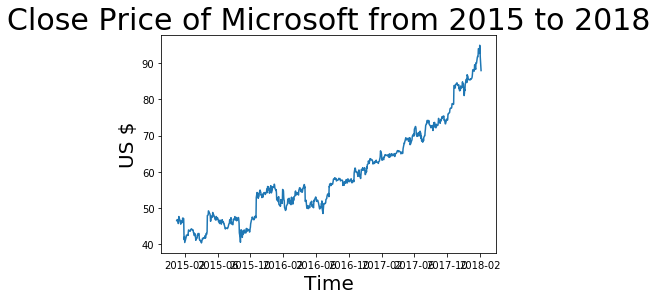

In [10]:
plt.title('Close Price of Microsoft from 2015 to 2018', size=30)
plt.xlabel('Time', size=20)
plt.ylabel('US $', size=20)
plt.plot(ms.loc[:, 'Close'])

In [11]:
ms['DailyReturn'] = (ms['Close'].shift(-1)) - np.log(ms['Close'])

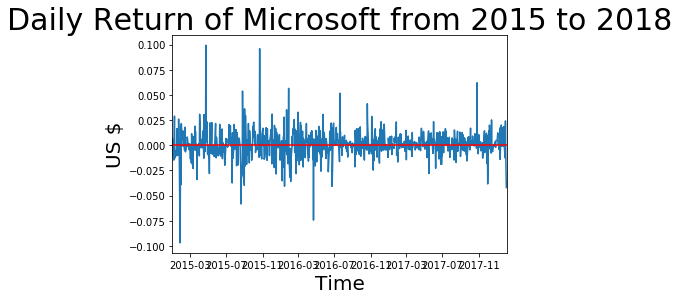

In [13]:
plt.title('Daily Return of Microsoft from 2015 to 2018', size=30)
plt.xlabel('Time', size=20)
plt.ylabel('US $', size=20)
plt.xlim(ms.index[0], ms.index[-1])
plt.plot(ms.loc[:, 'logReturn'])
plt.axhline(0, color='red')

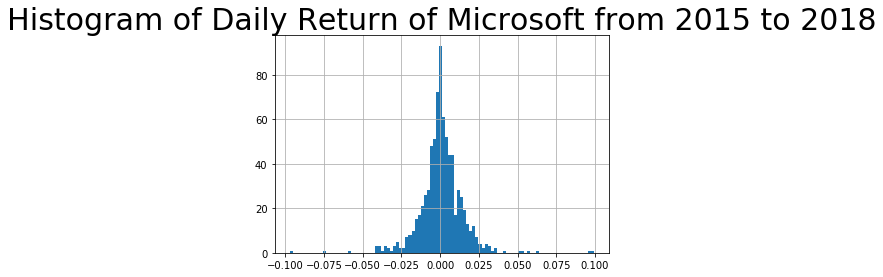

In [14]:
plt.title('Histogram of Daily Return of Microsoft from 2015 to 2018', size=30)
ms.loc[:, 'logReturn'].dropna().hist( bins=100)

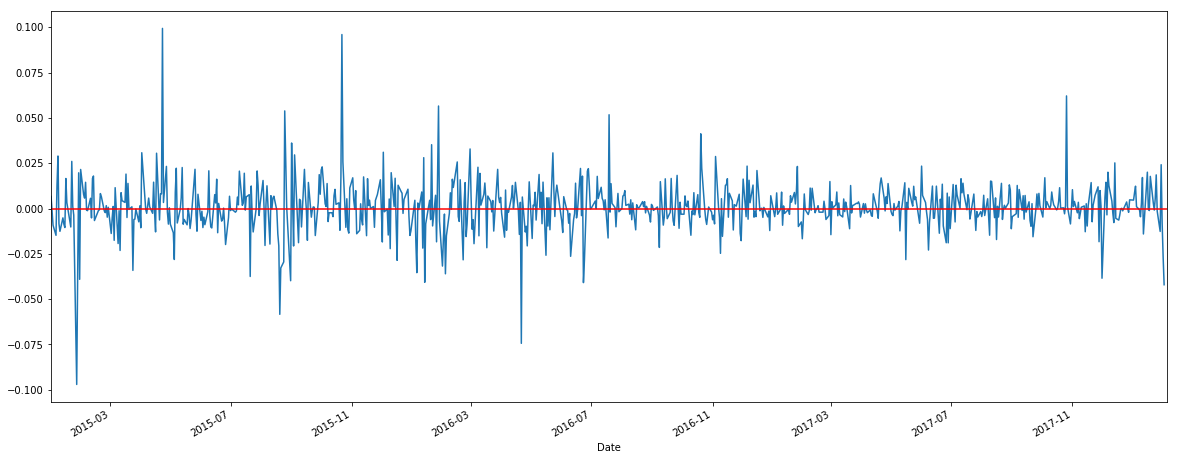

In [15]:
# Log return goes up and down during the period
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

## Steps involved in testing a claim by hypothesis testing

### Step 1: Set hypothesis

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

H0 means the average stock return is 0
H1 means the average stock return is not equal to 0

### Step 2: Calculate test statistic

In [16]:
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.614147714


### Step 3: Set desicion criteria

In [17]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.95996398454 1.95996398454


### Step 4:  Make decision - shall we reject H0?

In [18]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## Try one tail test by yourself ! 

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [20]:
# step 2
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0 )/ (sample_std/n**0.5)
print(zhat)

1.614147714


** Expected output: ** 1.6141477140003675

In [21]:
# step 3
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.64485362695


** Expected output: ** 1.64485362695

In [25]:
# step 4
print(zleft, zright)
print('At the significance level of', alpha)
print('Shall we reject?:', zhat>zright or zhat<zleft)

print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

-1.95996398454 1.64485362695
At the significance level of 0.05
Shall we reject?: False
At significant level of 0.05, shall we reject: False


** Expected output: ** At significant level of 0.05, shall we reject: False

# An alternative method: p-value

In [23]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694997


In [26]:
# step 4
print('At significant level of', alpha)
print( 'Shall we reject?:', p < alpha)

At significant level of 0.05
Shall we reject?: False


P-value
There is a typo about p-value in the video 3.4. Since this course will not be updated without new funding, the correct calculation of p-value is explained here in detail.

If Ha: mu not equal 0, it is two tail test and p-value=2(1-norm.cdf(np.abs(z), 0, 1))
if Ha: mu>0, it is upper tail test and p-value=1-norm.cdf(z,0,1)
if Ha:mu<0, it is lower tail test and p-value=norm.cdf(z,0,1)

In [28]:
data = pd.DataFrame()
data['population'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]  

In [30]:
data['population'].sample(5, replace=True)

9    60
4    19
2    85
1    48
9    60
Name: population, dtype: int64